## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\uyang\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x , flatten=True):
    x = 2*((x - x.min()) / (x.max() - x.min())) - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.7342 - acc: 0.3819 - val_loss: 1.5453 - val_acc: 0.4557
Epoch 2/100
50000/50000 [==============================] - 14s 281us/step - loss: 1.4849 - acc: 0.4757 - val_loss: 1.4651 - val_acc: 0.4809
Epoch 3/100
50000/50000 [==============================] - 14s 285us/step - loss: 1.3613 - acc: 0.5210 - val_loss: 1.4041 - val_acc: 0.5124
Epoch 4/100
50000/50000 [==============================] - 14s 270us/step - loss: 1.2557 - acc: 0.5576 - val_loss: 1.3734 - val_acc: 0.5204
Epoch 5/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.1735 - acc: 0.5854 - val_loss: 1.3733 - val_acc: 0.5291
Epoch 6/100
50000/50000 [==============================] - 13s 266us/step - loss: 1.0891 - acc: 0.6161 - val_loss: 1.3351 - val_acc: 0.5341
Epoch 7/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.0041 - acc: 0.6447 - val_l

Epoch 59/100
50000/50000 [==============================] - 14s 280us/step - loss: 0.0794 - acc: 0.9741 - val_loss: 3.4795 - val_acc: 0.5343
Epoch 60/100
50000/50000 [==============================] - 14s 280us/step - loss: 0.0817 - acc: 0.9745 - val_loss: 3.5185 - val_acc: 0.5385
Epoch 61/100
50000/50000 [==============================] - 14s 280us/step - loss: 0.0849 - acc: 0.9735 - val_loss: 3.4069 - val_acc: 0.5349
Epoch 62/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.0720 - acc: 0.9774 - val_loss: 3.4305 - val_acc: 0.5443
Epoch 63/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.0776 - acc: 0.9755 - val_loss: 3.4983 - val_acc: 0.5467
Epoch 64/100
50000/50000 [==============================] - 14s 282us/step - loss: 0.0700 - acc: 0.9777 - val_loss: 3.4653 - val_acc: 0.5417
Epoch 65/100
50000/50000 [==============================] - 14s 280us/step - loss: 0.0751 - acc: 0.9767 - val_loss: 3.5310 - val_acc: 0.5337
Epoch 66/100


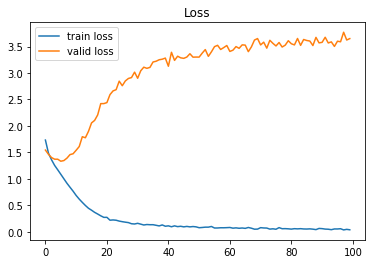

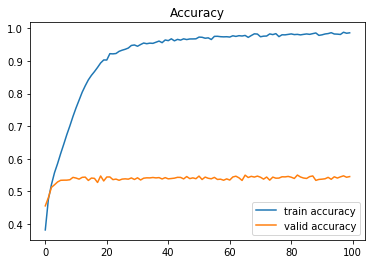

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()